# 0. Dependências

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

# 1. Introdução

Dada uma amostra com n observações com k preditores:

$$\{(x_{11},x_{12},...,x_{k1}, y_1), (x_{12},x_{22},...,x_{k2}, y_2),...,(x_{1n},x_{1n},...,x_{kn}, y_n)\}$$

O modelo consiste das seguintes n equações:

$$\left\{
  \begin{array}{ll}
    y_1=b_0+b_1x_{11}+b_2x_{21}+...+b_kx_{k1}+e1\\
    y_2=b_0+b_1x_{12}+b_2x_{22}+...+b_kx_{k2}+e1\\
    ...\\
    y_n=b_0+b_1x_{1n}+b_2x_{2n}+...+b_kx_{kn}+e1\\
  \end{array}
\right.
$$

Que pode ser convertido na notação vetorial:

$$
\begin{bmatrix}y_1 \\y_2 \\. \\. \\. \\y_n \end{bmatrix} =
\begin{bmatrix}1 & x_{11} & x_{21} & ... & x_{k1} 
\\1 & x_{12} & x_{22} & ... & x_{k2}  
\\.&.&.&.&. 
\\.&.&.&.&. 
\\.&.&.&.&. 
\\1 & x_{1n} & x_{2n} & ... & x_{kn}
\end{bmatrix}
\begin{bmatrix}b_0 \\b_1 \\. \\. \\. \\b_n \end{bmatrix}
+
\begin{bmatrix}e_1 \\e_2 \\. \\. \\. \\e_n \end{bmatrix}
$$

$$\textbf{Y = Xb + e}$$

Para resolver esse sistema, vamos utilizar o **Método dos mínimos quadrados**.

### Métodos dos Mínimos Quadrados

Estimação dos parâmetros:

$$b = (X^TX)^{-1}(X^TY)$$

# 2. Dados

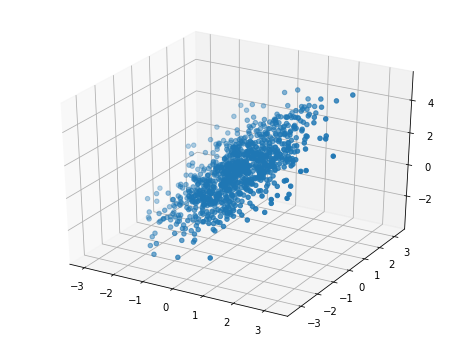

In [2]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

x1 = np.random.randn(1000,1)
x2 = np.random.randn(1000,1)
y = x1 + x2 + np.random.rand(1000,1) # acrescenta um erro aleatorio
ax.scatter3D(x1, x2, y)

In [3]:
x = np.hstack((x1, x2))

# 3. Implementação

In [4]:
class MultivariateRegression():
    def __init__(self):
        self.intercept_ = None
        self.coef_ = None
    
    def fit(self, x, y):
        x = np.hstack((np.ones((x.shape[0], 1)), x))

        b1 = np.linalg.inv(np.dot(x.T, x))
        b2 = np.dot(x.T, y)
        b = np.dot(b1, b2)
        
        self.intercept_ = b[0]
        self.coef_ = b[1:]
    
    def predict(self, x):
        return np.dot(x, self.coef_) + self.intercept_

In [5]:
reg = MultivariateRegression()
reg.fit(x, y)

print(reg.intercept_)
print(reg.coef_)

[0.49646308]
[[0.9939802]
 [0.9927422]]


# 4. Teste 

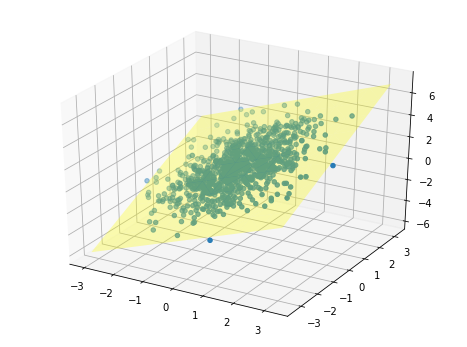

In [6]:
x1_ = np.linspace(np.min(x1), np.max(x1), 10)
x2_ = np.linspace(np.min(x2), np.max(x2), 10)
x1v, x2v = np.meshgrid(x1_, x2_)
x1v, x2v = x1v.reshape(-1, 1), x2v.reshape(-1,1)

xv = np.hstack((x1v, x2v))
y_pred = reg.predict(xv)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x1, x2, y)
ax.plot_trisurf(x1v.ravel(), x2v.ravel(), y_pred.ravel(), alpha=0.3, color='yellow', shade=False)

### Comparação com o Scikit-learn

In [7]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x, y)

print(reg.intercept_)
print(reg.coef_)

[0.49646308]
[[0.9939802 0.9927422]]
